# Machine Learning Regression Practice

1. When problem tends to be straight line or when graph ploted and trend seems straight line then it is linear and hence
   equation to be used to define rules is straight line mathematical equation : y=mx+c
2. In machine learning if its simple linear regression then equation to be used is: y=mx+c+E ( E: elipson/error/residual/loss )
   i.e in simple linear regression only 1 dependent variable to be predicted and 1 independent varibale will be there.
3. If more than 2 independent variables and 1 dependent variable is there then its is mulitple linear regression.
4. When problem tends to be not straight line or when graph ploted and trend seems other shapes line curved / s shape etc then
   its is not the problem of linearity , we need to be used polynomial regression for that.

# Data Loading and Preprocessing

#### Importing Package and Checking Datasets

In [1]:
import pandas as pd
import seaborn as sb

In [2]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

#### Loading Dataset  and Analysing

In [3]:
mpg=sb.load_dataset('mpg')

In [4]:
copied_mpg=mpg.copy()

In [5]:
copied_mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [6]:
copied_mpg.shape

(398, 9)

In [7]:
copied_mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

#### Data Cleaning

In [8]:
# Data cleaning - check for null values in horsepower and mpg
copied_mpg[['horsepower','mpg']].isnull().sum()

horsepower    6
mpg           0
dtype: int64

In [9]:
# fill null values with 0
copied_mpg['horsepower']=copied_mpg['horsepower'].fillna(0)
copied_mpg[['horsepower','mpg']].isnull().sum()

horsepower    0
mpg           0
dtype: int64

In [10]:
 # check null values in all columns  - if any correct it
copied_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

#### Before coontinuing further all the required steps need to accomplished priorly
1. Data Pre processing
2. Pattern checks
3. Exploratory data analysis : is all params required to predict the mpg ( milage per gallon )
4. Feature Engineering : domain knowledge and statistician required, select columns which required and check how it impact the
   mpg or not, select features valid for prediction.

# 1. Simple Linear Regression

Problem Statement : Predict MPG ( Milage per Gallon ) from Horsepower

#### Importing Neccesary Packages

In [11]:
# Used for title and resizing graph
import matplotlib.pyplot as mp

# Used Machine Learning Package - scikit learn
from sklearn.linear_model import LinearRegression

#### Regression Plot

Text(0.5, 1.0, 'MPG v/s Horsepower')

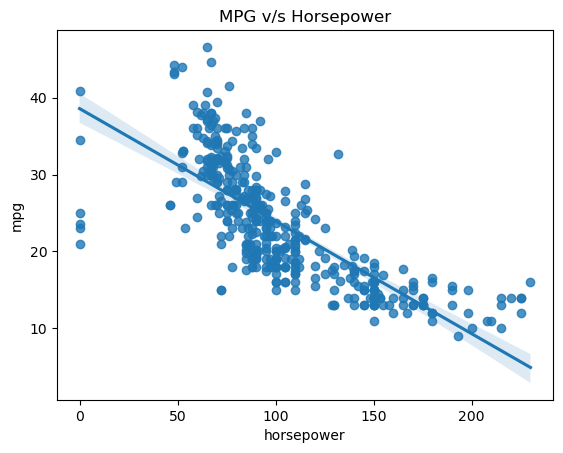

In [12]:
# consider - (Dependent) mpg as y and (Independent) horspower as x
# pattern check or trend check to decide which model can be used
sb.regplot(x='horsepower',y='mpg',data=copied_mpg)
mp.title("MPG v/s Horsepower")

#### Correlation Check

In [13]:
copied_mpg[['horsepower','mpg']].corr()

,horsepower,mpg
horsepower,1.000000,-0.754276
mpg,-0.754276,1.000000


#### Reshaping and Separting X and Y to Suit Simple Linear Regression

In [14]:
x=copied_mpg.horsepower.values.reshape(-1,1)
x

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.],
       [198.],
       [220.],
       [215.],
       [225.],
       [190.],
       [170.],
       [160.],
       [150.],
       [225.],
       [ 95.],
       [ 95.],
       [ 97.],
       [ 85.],
       [ 88.],
       [ 46.],
       [ 87.],
       [ 90.],
       [ 95.],
       [113.],
       [ 90.],
       [215.],
       [200.],
       [210.],
       [193.],
       [ 88.],
       [ 90.],
       [ 95.],
       [  0.],
       [100.],
       [105.],
       [100.],
       [ 88.],
       [100.],
       [165.],
       [175.],
       [153.],
       [150.],
       [180.],
       [170.],
       [175.],
       [110.],
       [ 72.],
       [100.],
       [ 88.],
       [ 86.],
       [ 90.],
       [ 70.],
       [ 76.],
       [ 65.],
       [ 69.],
       [ 60.],
       [ 70.],
       [ 95.],
       [ 80.],
       [ 54.],
       [ 90.],
       [ 86.],
       [165.],
       [175.],
       [150.],
       [153.],
       [15

In [15]:
y=copied_mpg.mpg.values.reshape(-1,1)
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

#### Model Preparation and Training

In [16]:
# Creating object or variable from Linear Regression model
model = LinearRegression()

# Train the model or model fitting
model_train=model.fit(x,y)
print("Model Training Completed")

Model Training Completed


#### Getting Information of Slope, Fixed Value and Accuracy Percentage

In [17]:
# check slope or m or coefficient value
model_train.coef_

array([[-0.14639875]])

In [18]:
# check intercept or constant or fixed value
model_train.intercept_

array([38.57819499])

In [19]:
# R square value / how fit the model is / accuracy percentage
# rangs from 0 to 1 - more towards 0 is less accurate and more towards 1 is more accurate
model_train.score(x,y)

0.5689325831271121

#### Predicting New MPG value from Horsepower value

In [20]:
# predition
m=150
y=(model_train.coef_*m)+model_train.intercept_

# print predicted value
print(y)

[[16.6183825]]


In [21]:
# cross checking myself for 149 horsepower how much is mpg value and how much predicted for 150 above so close
copied_mpg[copied_mpg['horsepower']==149]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
232,16.0,8,351.0,149.0,4335,14.5,77,usa,ford thunderbird


# 2. Multiple Linear Regression

Problem Statement: 
1. Predict MPG from Horsepower and Culinders
2. Predict MPG from All the Values except origin and name ( Given as Homework )

#### Importing Neccesary Packages

In [22]:
# Used for title and resizing graph
import matplotlib.pyplot as mp

# Used Machine Learning Package - scikit learn
from sklearn.linear_model import LinearRegression

#### Regression Plotting one by one

Text(0.5, 1.0, 'Horsepower v/s MPG')

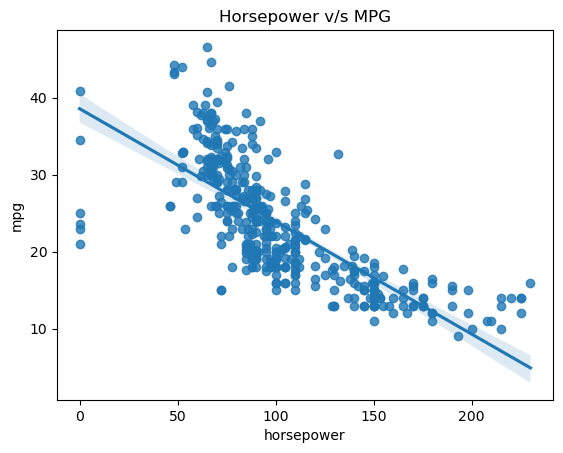

In [23]:
# plot graph horsepower vs mpg
sb.regplot(x='horsepower',y='mpg',data=copied_mpg)
mp.title("Horsepower v/s MPG")

Text(0.5, 1.0, 'Cylinders v/s MPG')

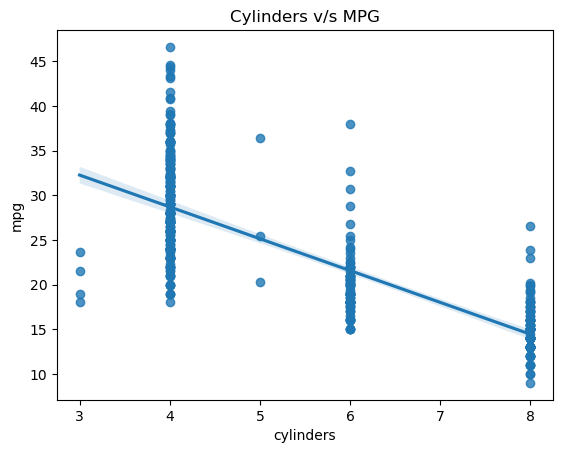

In [24]:
# plot graph cylinders vs mpg - falling in categories like 4, 6 etc like that
sb.regplot(x='cylinders',y='mpg',data=copied_mpg)
mp.title("Cylinders v/s MPG")

Text(0.5, 1.0, 'Horsepower v/s Cylinders')

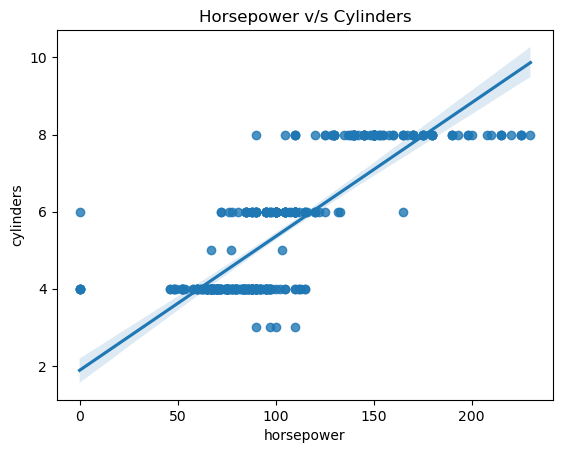

In [25]:
# plot graph horsepower vs cylinders
sb.regplot(x='horsepower',y='cylinders',data=copied_mpg)
mp.title("Horsepower v/s Cylinders")

#### Correlation Check

In [26]:
# is cylinder is important or not to consider check correlation percentage
# if higly corelated then its not required that much becuase both horse power and cylinders are dependent each other
# if horse power increase cylinder increase so
# but considering may help to increase accuracy 
copied_mpg[['horsepower','cylinders','mpg']].corr()

,horsepower,cylinders,mpg
horsepower,1.000000,0.821656,-0.754276
cylinders,0.821656,1.000000,-0.775396
mpg,-0.754276,-0.775396,1.000000


#### Separating X1 and Y1 values to suit Multiple Linear Regression

In [27]:
x1=copied_mpg[['horsepower','cylinders']]
x1

,horsepower,cylinders
0,130.0,8
1,165.0,8
2,150.0,8
3,150.0,8
4,140.0,8
...,...,...
393,86.0,4
394,52.0,4
395,84.0,4
396,79.0,4


In [28]:
y1=copied_mpg['mpg']
y1

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

#### Model Preparation and Training

In [29]:
# Creating object or variable from Linear Regression model
model2=LinearRegression()

# Train the model or model fitting
model2_train=model2.fit(x1,y1)
print("Training Completed")

Training Completed


#### Getting Information of Slope, Fixed Value and Accuracy Percentage

In [30]:
# Check slope or m or coefficient value
model2.coef_

array([-0.06999835, -2.20128708])

In [31]:
# Check for intercept or fixed value
model2.intercept_

42.72453951282657

In [32]:
# Accuracy Percentage or R Square Value
model2.score(x1,y1) # increased accuracy

0.6434951301715306

#### Predicting New MPG value from Horsepower value

In [33]:
# Prediction
m1=150
m2=6
y=(model2.coef_[0]*m1)+(model2.coef_[1]*m2)+model2.intercept_

# Print predicted value
print(y)

19.017064369035428


In [34]:
# Cross checking for myself
# copied_mpg[copied_mpg[['horsepower','cylinders']]==[150,8]] its not work as expected tried my own
copied_mpg[copied_mpg['cylinders']==6].shape[0] # total how many records as value_counts dint work so used shape 84 found
copied_mpg[copied_mpg['cylinders']==6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
15,22.0,6,198.0,95.0,2833,15.5,70,usa,plymouth duster
16,18.0,6,199.0,97.0,2774,15.5,70,usa,amc hornet
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
24,21.0,6,199.0,90.0,2648,15.0,70,usa,amc gremlin
33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin
...,...,...,...,...,...,...,...,...,...
365,20.2,6,200.0,88.0,3060,17.1,81,usa,ford granada gl
366,17.6,6,225.0,85.0,3465,16.6,81,usa,chrysler lebaron salon
386,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel)


### Use Case : Taking Input from User for Prediction

In [59]:
# Problem Statement: Predict Bonus to be given to Employee based on Salary, Performance, Experience 
office=pd.DataFrame({'Salary':[10,20,30,40,50],'Performance':['A','B','C','D','A'],'Experience':[1,2,3,4,5],'Bonus':[12,7,5,2,19]})
office

,Salary,Performance,Experience,Bonus
0,10,A,1,12
1,20,B,2,7
2,30,C,3,5
3,40,D,4,2
4,50,A,5,19


In [60]:
# Converting Grades into Numerics
Score_Values={'A':1,'B':0.75,'C':0.5,'D':0.25}
office['Performance']=office['Performance'].map(Score_Values)
office

,Salary,Performance,Experience,Bonus
0,10,1.00,1,12
1,20,0.75,2,7
2,30,0.50,3,5
3,40,0.25,4,2
4,50,1.00,5,19


In [64]:
# Separating X and Y
X=office[['Salary','Performance','Experience']]
X

,Salary,Performance,Experience
0,10,1.00,1
1,20,0.75,2
2,30,0.50,3
3,40,0.25,4
4,50,1.00,5


In [65]:
Y=office['Bonus']
Y

0    12
1     7
2     5
3     2
4    19
Name: Bonus, dtype: int64

In [66]:
# Regression Modelling
modelXY=LinearRegression()
modelXY.fit(X,Y)

LinearRegression()

In [68]:
# Predicting History Values
office['Predicted_Bonus']=modelXY.predict(X)
office

,Salary,Performance,Experience,Bonus,Predicted_Bonus
0,10,1.00,1,12,11.3
1,20,0.75,2,7,8.1
2,30,0.50,3,5,4.9
3,40,0.25,4,2,1.7
4,50,1.00,5,19,19.0


In [ ]:
# Taking User Input For Current or Future Prediction
salary=int(input("Enter Employee Salary: "))
performance=input("Enter Employee Perfromance Grade: A - D: ")
experience=int(input("Enter Total Years of Experience of the Employee: "))

# Making a data frame
m=pd.DataFrame({'Salary':[salary],'Performance':[performance],'Experience':[experience]})
m

In [78]:
# Transforming grade to score
m['Performance']=m['Performance'].map(Score_Values)
m

,Salary,Performance,Experience
0,21,1.0,2


In [79]:
# Predicting from User Values
modelXY.predict(m)

array([13.41559406])

# 3. Polynomial Regression

#### Importing Neccesary Packages

In [36]:
# Import math sqrt for square root finding 
from math import sqrt

# Import pandas for dataframe and matplotlib for plotting
import pandas as pd
import matplotlib.pyplot as mp

# Import scikit learn LinearRegression, PolynomialFeatures and mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#### Creating DataFrame

In [37]:
data = pd.DataFrame({'temp':[0,10,20,40,60,80,100],'pressure':[0.0005,0.0012,0.035,0.20,1,1.2,1.5]})
data

,temp,pressure
0,0,0.0005
1,10,0.0012
2,20,0.0350
3,40,0.2000
4,60,1.0000
5,80,1.2000
6,100,1.5000


#### Reshaping and Separating Values into X3 and Y3

In [38]:
x3=data['temp'].values.reshape(-1,1)
x3

array([[  0],
       [ 10],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

In [39]:
y3=data['pressure'].values.reshape(-1,1)
y3

array([[5.0e-04],
       [1.2e-03],
       [3.5e-02],
       [2.0e-01],
       [1.0e+00],
       [1.2e+00],
       [1.5e+00]])

#### Making Polynomial Equation of Degree 4

In [40]:
poly=PolynomialFeatures(degree=4) 
x3_poly=poly.fit_transform(x3)      
x3_poly

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 2.000e+01, 4.000e+02, 8.000e+03, 1.600e+05],
       [1.000e+00, 4.000e+01, 1.600e+03, 6.400e+04, 2.560e+06],
       [1.000e+00, 6.000e+01, 3.600e+03, 2.160e+05, 1.296e+07],
       [1.000e+00, 8.000e+01, 6.400e+03, 5.120e+05, 4.096e+07],
       [1.000e+00, 1.000e+02, 1.000e+04, 1.000e+06, 1.000e+08]])

#### Training Linear Regression from Polynomial Values of X

In [41]:
model3=LinearRegression()
model3_train=model3.fit(x3_poly,y3)
print("Training Completed")

Training Completed


#### Predicting Automatically rather than Equation of Regression

In [42]:
pred=model3_train.predict(poly.transform(x3))
pred

array([[ 3.02247005e-02],
       [-4.53647221e-02],
       [ 9.69368907e-04],
       [ 3.44456509e-01],
       [ 8.40264441e-01],
       [ 1.28314186e+00],
       [ 1.48300784e+00]])

#### Comparing Actual Pressure vs Predicted Pressure Closeness

In [43]:
data['pred_pressure']=model3_train.predict(poly.fit_transform(x3))
data

,temp,pressure,pred_pressure
0,0,0.0005,0.030225
1,10,0.0012,-0.045365
2,20,0.0350,0.000969
3,40,0.2000,0.344457
4,60,1.0000,0.840264
5,80,1.2000,1.283142
6,100,1.5000,1.483008


#### Error Finding

In [44]:
mean_squared_error(y3,pred)

0.00825633561897247

In [45]:
sqrt(mean_squared_error(y3,pred))

0.09086438036421352

#### Fixed Value and Accuracy Percentage ( R Sqaure Value )

In [46]:
model3_train.intercept_

array([0.0302247])

In [47]:
model3_train.score(x3_poly,y3)

0.9770409791789565

#### Plotting Polynomial Regression Graph

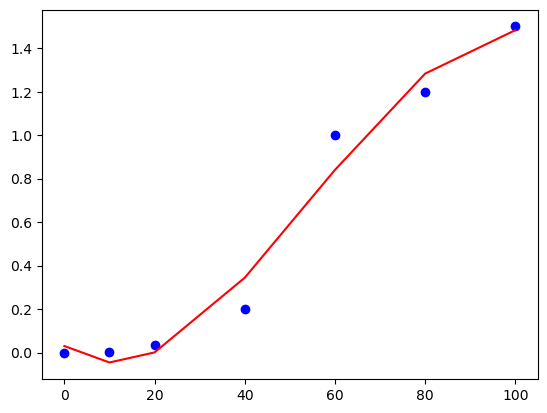

In [48]:
mp.scatter(x3,y3,color='blue')
mp.plot(x3,model3_train.predict(poly.fit_transform(x3)),color='red')

#### Predicting from User Values

In [49]:
m=pd.Series([12,16,18,20])
m=m.values.reshape(-1,1)
m

array([[12],
       [16],
       [18],
       [20]], dtype=int64)

In [50]:
pred1=model3_train.predict(poly.transform(m))
pred1

array([[-0.04491093],
       [-0.03031945],
       [-0.01664688],
       [ 0.00096937]])